In [3]:
import random as rnd
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import os
import imageio

In [4]:
def initialization(L, rho):
    """
    Function initializes the cars on the road of length L accordingly to the density parameter,
    The information about the cars is stored in a list of three-element lists, where each value 
    corresponds to the position of a car, its speed and its colour.
    
    Arguments:
    L - length of the road - integer
    rho - density of the road - float from range [0,1]
    
    Function returns the list of cars, positions and colors
    """
    road = list(range(L))
    cars = []
    for i in road:
        rand = rnd.random()
        if rand < rho:
            cars.append([i,0])
    positions = []
    color = np.linspace(0,len(cars)-1,len(cars))
    for k in range(len(cars)):
            positions.append(cars[k][0])
            cars[k] = [cars[k][0],cars[k][1],color[k]]
    return cars, positions, color

def animate(L, p , v_max, cars, positions,color, steps = 100, visualize = True):
    """
    Function simulates and animates the Nagel-Schreckenberg model of traffic, where the cars on the road are moving,
    accelerating and slowing down accordingly to the rules of the model. 
    
    Arguments:
    L - length of the road - integer
    rho - density of the road - float from range [0,1]
    v_max - maximum velocity of a car - integer
    cars - list of the cars' attributes on the road
    positions - list of the cars' positions
    color - list of the cars' colors
    steps - number of steps of the animation - integer
    visualize - True if the figures are to be made, False otherwise - boolean
    
    Function returns the average velocity of all cars of the average calculated at each timestep
    """
    if visualize == True:
        plt.scatter(positions, np.ones(len(positions)), c=color)
        plt.title("Nagel-Schreckenberg model")
        plt.xlim(0,100)
        fig = plt.gcf()
        fig.savefig("Figure" + str(0) + ".png",dpi = 200)
        plt.close()
    avg_speed = []
    for z in range(100):
        speeds = []
        for c1 in range(len(cars)):#1 step
                cars[c1]=[cars[c1][0],cars[c1][1], cars[c1][2]]
                if cars[c1][1] != v_max:
                    cars[c1][1] += 1
        new_pos = []
        for c2 in range(len(cars)):  #2 step  
            if c2 == len(cars)-1:
                new_pos.append(min(cars[0][0] - cars[c2][0]+L-1, cars[c2][1]))   
            else:
                new_pos.append(min(abs(cars[c2+1][0] - cars[c2][0])-1, cars[c2][1])) 
        for i in range(len(new_pos)):
            cars[i][1] = new_pos[i]
        for c3 in cars:#3 step
            rand2= rnd.random()
            if rand2<p and c3[1] > 0:
                c3[1]-=1
        for c4 in cars:#4 step
            c4[0]+=c4[1]
            c4[0] = c4[0]%L
            speeds.append(c4[1])
        avg_speed.append(np.mean(speeds))
        cars = sorted(cars, key=lambda x: x[0])
        positions = []
        for k in cars:
            positions.append(k[0])
        colors = []
        for col in cars:
            colors.append(col[2])
        if visualize == True:
            plt.scatter(positions, np.ones(len(positions)), c=colors)
            plt.title("Nagel-Schreckenberg model")
            plt.xlim(0,100)
            fig = plt.gcf()
            fig.savefig("Figure" + str(z+1) + ".png",dpi = 200)
            plt.close()
    avg_velocity = np.mean(avg_speed)
    return avg_velocity

def create_gif(path, duration):
    """
    Function creates gif from the images that are already in the given directory
    
    Arguments: 
    path - path where the images are being stored - string
    duration - duration in seconds of a each step of the simulation in the gif
    
    Function only creates gif and doesn't return anything.
    """
    images = []
    dirs = os.listdir(path)
    new_images = sorted(dirs, key = len)
    for file in new_images:
        if file.endswith(".png"):
                images.append(imageio.imread(file))
    kargs = { 'duration': duration }
    imageio.mimsave(path+"\\gif1.gif", images,**kargs) 

In [5]:
L = 100
rho = 0.6
v_max = 5
p = 0.5

road = initialization(L,rho)
animate(L,p,v_max,road[0], road[1], road[2], 100, True)


0.23415384615384613

In [43]:
create_gif("C:\\Users\\user\\Desktop\\Applied mathematics\\Semestr 2\\Agent based modelling\\Untitled folder", 0.1)

In [6]:
rhos = list(range(5,105,5))
rhos = [i/100 for i in rhos]  
velocitiesp02=[]
velocitiesp03=[]
velocitiesp05=[]
for i in rhos:
    road02 = initialization(L,i)
    velocitiesp02.append(animate(L,0.2,v_max,road02[0], road02[1], road02[2],100, False))
    road03 = initialization(L,i)
    velocitiesp03.append(animate(L,0.3,v_max,road03[0], road03[1], road03[2],100, False))
    road05 = initialization(L,i)
    velocitiesp05.append(animate(L,0.5,v_max,road05[0], road05[1], road05[2],100, False))


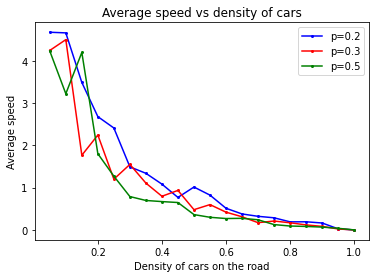

In [7]:
plt.figure()
plt.plot(rhos,velocitiesp02,'-o',markersize=2,color = "blue",label='p=0.2')
plt.plot(rhos,velocitiesp03,'-o',markersize=2,color = "red",label='p=0.3')
plt.plot(rhos,velocitiesp05,'-o',markersize=2,color = "green",label='p=0.5')
plt.legend()
plt.ylabel("Average speed")
plt.xlabel("Density of cars on the road")
plt.title("Average speed vs density of cars")
fig = plt.gcf()
fig.savefig("Average speed vs density.png",dpi = 500)
plt.show()